In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mysql_host = 'localhost'
mysql_username = 'root'
mysql_password = 'Anu123'
mysql_database = 'medical_inventory_optimization'

connection = mysql.connector.connect(
    host = mysql_host,
    user = mysql_username,
    password = mysql_password,
    database = mysql_database
)

cursor = connection.cursor()

query = 'SELECT * FROM medical_inventory;'
cursor.execute(query)
data = cursor.fetchall()

column_names = [i[0] for i in cursor.description]

df = pd.DataFrame(data, columns=column_names)

cursor.close()
connection.close()

df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,DateofBill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-01-06,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.210,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


### Statistical Analysis

In [3]:
df.shape

(12061, 14)

In [4]:
df[df.duplicated()].shape

(16, 14)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(12045, 14)

In [7]:
df.isna().sum()

Typeofsales        0
Patient_ID         0
Specialisation     0
Dept               0
DateofBill         0
Quantity           0
ReturnQuantity     0
Final_Cost         0
Final_Sales        0
RtnMRP             0
Formulation        0
DrugName           0
SubCat             0
SubCat1           23
dtype: int64

In [8]:
## Replacing all the values using mode() depending on the Sub-Category value

df.loc[df.SubCat == 'TABLETS & CAPSULES', 'SubCat1'] = 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM'

df.loc[df.SubCat == 'NUTRITIONAL SUPPLEMENTS', 'SubCat1'] = 'NUTRITION'

df.loc[df.SubCat == 'OINTMENTS, CREAMS & GELS', 'SubCat1'] = 'ANAESTHETICS'

df.loc[df.SubCat == 'SPRAY', 'SubCat1'] = 'CENTRAL NERVOUS SYSTEM'

df.loc[df.SubCat == 'POWDER','SubCat1'] = 'GASTROINTESTINAL & HEPATOBILIARY SYSTEM'

In [9]:
df[df.SubCat1.isna()].shape

(0, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12045 entries, 0 to 12060
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     12045 non-null  object 
 1   Patient_ID      12045 non-null  int64  
 2   Specialisation  12045 non-null  object 
 3   Dept            12045 non-null  object 
 4   DateofBill      12045 non-null  object 
 5   Quantity        12045 non-null  int64  
 6   ReturnQuantity  12045 non-null  int64  
 7   Final_Cost      12045 non-null  float64
 8   Final_Sales     12045 non-null  float64
 9   RtnMRP          12045 non-null  float64
 10  Formulation     12045 non-null  object 
 11  DrugName        12045 non-null  object 
 12  SubCat          12045 non-null  object 
 13  SubCat1         12045 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.4+ MB


In [11]:
df['DateofBill'] = pd.to_datetime(df['DateofBill'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12045 entries, 0 to 12060
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     12045 non-null  object        
 1   Patient_ID      12045 non-null  int64         
 2   Specialisation  12045 non-null  object        
 3   Dept            12045 non-null  object        
 4   DateofBill      12045 non-null  datetime64[ns]
 5   Quantity        12045 non-null  int64         
 6   ReturnQuantity  12045 non-null  int64         
 7   Final_Cost      12045 non-null  float64       
 8   Final_Sales     12045 non-null  float64       
 9   RtnMRP          12045 non-null  float64       
 10  Formulation     12045 non-null  object        
 11  DrugName        12045 non-null  object        
 12  SubCat          12045 non-null  object        
 13  SubCat1         12045 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)


In [13]:
df_sales = df[df.Typeofsales == 'Sale']
columns = ['ReturnQuantity','RtnMRP']
df_sales.drop(columns, axis = 1, inplace=True)
df_sales.shape

(10896, 12)

In [14]:
df_return = df[df.Typeofsales == 'Return']
columns = ['Quantity','Final_Sales']
df_return.drop(columns, axis = 1, inplace=True)
df_return.shape

(1149, 12)

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,10896.00,12018086015.42,28148.49,12017998218.00,12018077577.00,12018091501.00,12018105108.00,12018125353.00
Quantity,10896.00,2.13,3.70,1.00,1.00,1.00,2.00,150.00
Final_Cost,10896.00,135.63,517.14,40.00,44.93,54.60,84.62,33178.00
Final_Sales,10896.00,263.19,733.32,40.19,53.00,99.53,199.56,39490.00


In [16]:
df_return.describe

<bound method NDFrame.describe of       Typeofsales   Patient_ID    Specialisation         Dept DateofBill  \
5          Return  12018103662   Specialisation2  Department1 2022-07-15   
16         Return  12018122962  Specialisation54  Department1 2022-12-19   
30         Return  12018070314  Specialisation17  Department1 2022-01-17   
34         Return  12018073358   Specialisation4  Department1 2022-02-22   
58         Return  12018044320  Specialisation21  Department1 2022-11-05   
...           ...          ...               ...          ...        ...   
11969      Return  12018108256   Specialisation2  Department1 2022-08-18   
11981      Return  12018086083  Specialisation17  Department1 2022-09-02   
11993      Return  12018080106  Specialisation20  Department1 2022-02-06   
12032      Return  12018114078  Specialisation16  Department1 2022-10-20   
12048      Return  12018075839   Specialisation3  Department1 2022-05-26   

       ReturnQuantity  Final_Cost  RtnMRP Formulation

In [17]:
pd.options.display.float_format = '{:.2f}'.format
df.var(numeric_only=True)

Patient_ID       792308073.63
Quantity                12.76
ReturnQuantity           0.69
Final_Cost          249966.47
Final_Sales         492432.82
RtnMRP               23223.86
dtype: float64

In [18]:
pd.options.display.float_format = None

In [19]:
df_sales.skew(numeric_only=True)

Patient_ID     -1.352114
Quantity       16.769628
Final_Cost     32.329614
Final_Sales    20.666012
dtype: float64

In [20]:
df_return.skew(numeric_only=True)

Patient_ID        -1.347202
ReturnQuantity     3.694450
Final_Cost        12.573654
RtnMRP             7.773931
dtype: float64

In [21]:
sales_columns = ['Quantity', 'Final_Cost', 'Final_Sales']
return_columns = ['ReturnQuantity', 'Final_Cost', 'RtnMRP']

def Plot(df, columns,plottype):
    ix = 1
    fig = plt.figure(figsize = (10,7))
    for c in columns:
        if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            ax2.tick_params(axis='x', labelrotation=90)           
            if(plottype == 'outliers'):
                sns.boxplot(y=c,data=df, ax=ax2) #boxplot for outliers     
            fig.tight_layout()
        ix = ix +1
        if ix == 4: 
            fig = plt.figure(figsize = (15,10))
            ix = 1

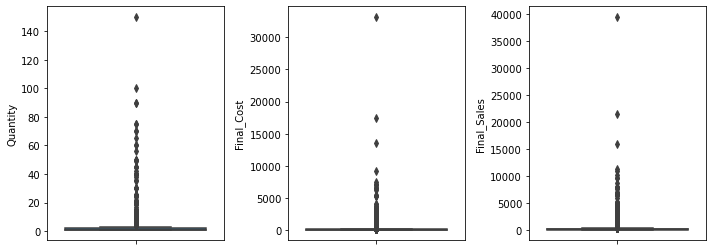

<Figure size 1080x720 with 0 Axes>

In [22]:
Plot(df_sales, sales_columns, 'outliers')

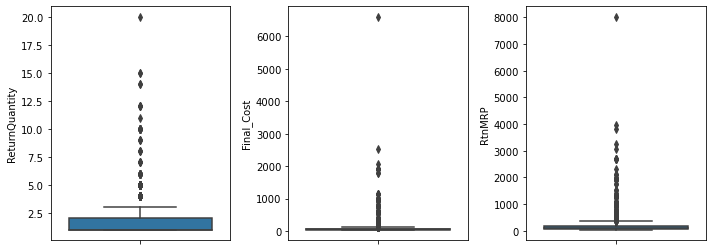

<Figure size 1080x720 with 0 Axes>

In [23]:
Plot(df_return, return_columns, 'outliers')

In [24]:
def textDisplay_in_plots(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

### Univariate analysis

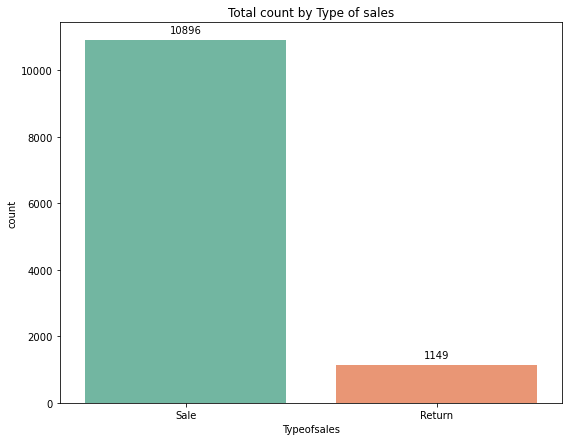

In [25]:
plt.figure(figsize=(9,7))
plt.title('Total count by Type of sales')
ax = sns.countplot(x = 'Typeofsales', data = df, palette='Set2')
textDisplay_in_plots(ax)
plt.show()

Text(0, 0.5, '')

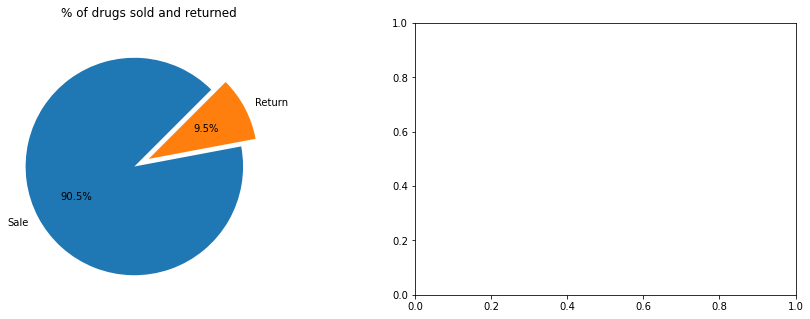

In [28]:
f,axes = plt.subplots(1,2, figsize = (15,5))
df['Typeofsales'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.15, 0), ax=axes[0],
                        startangle=45, shadow=False)
axes[0].set_title('% of drugs sold and returned')
axes[0].set_ylabel('')

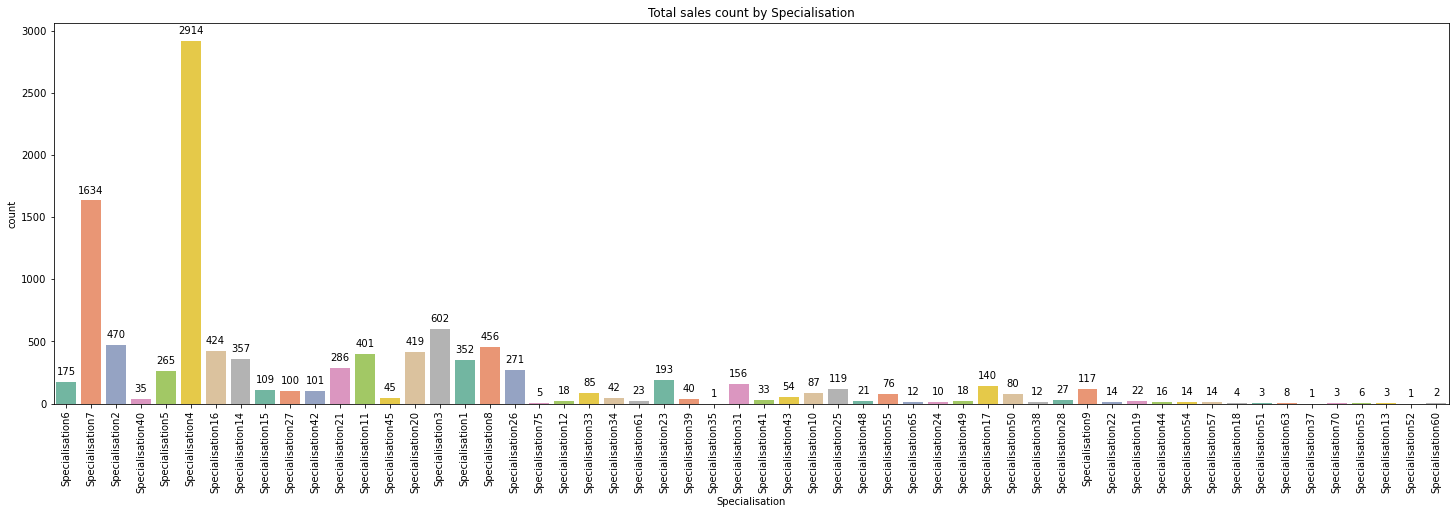

In [354]:
plt.figure(figsize=(25,7))
plt.xticks(rotation = 90)
plt.title('Total sales count by Specialisation')
ax = sns.countplot(x = 'Specialisation', data = df_sales, palette='Set2')
textDisplay_in_plots(ax)
plt.show()

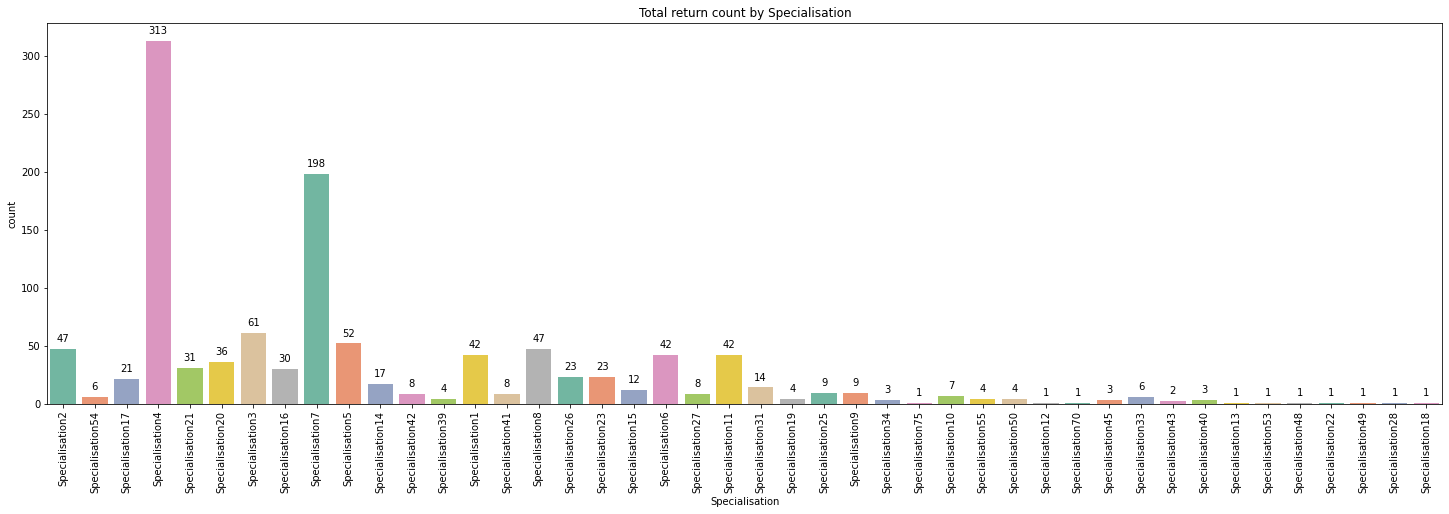

In [356]:
plt.figure(figsize=(25,7))
plt.xticks(rotation = 90)
plt.title('Total return count by Specialisation')
ax = sns.countplot(x = 'Specialisation', data = df_return, palette='Set2')
textDisplay_in_plots(ax)
plt.show()

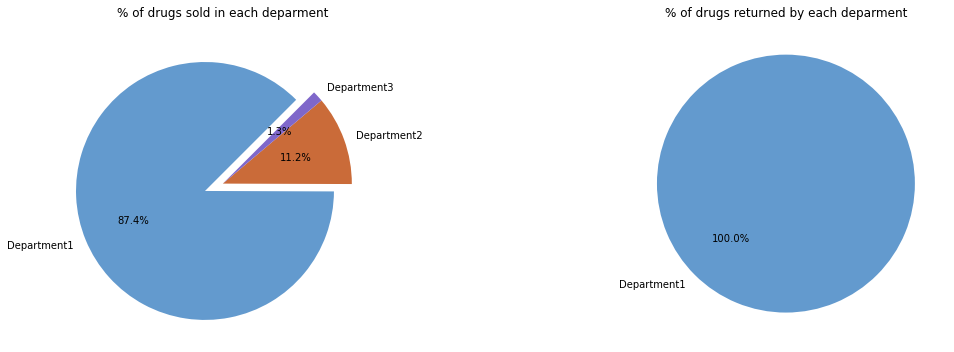

In [514]:
f,axes = plt.subplots(1,2, figsize = (15,5))
df_sales['Dept'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.15, 0, 0),
                        startangle=45, shadow=False, colors = colors, ax=axes[0])
df_return['Dept'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        startangle=45, shadow=False, colors = colors,ax=axes[1])
axes[0].set_title('% of drugs sold in each deparment')
axes[1].set_title('% of drugs returned by each deparment')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.tight_layout(w_pad= 12)
plt.show()

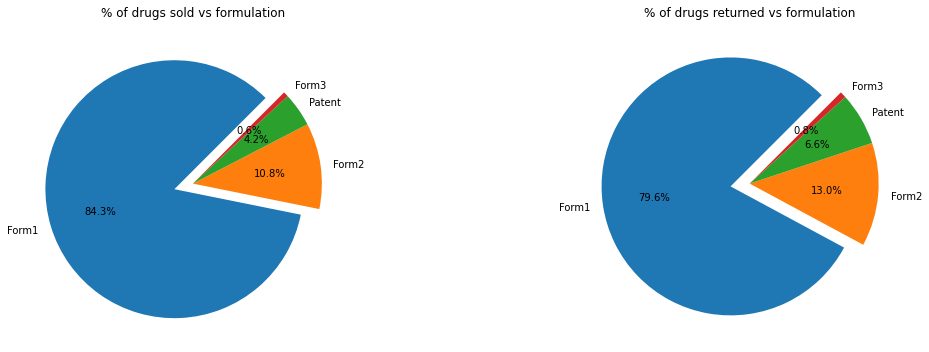

In [515]:
f,axes = plt.subplots(1,2, figsize = (15,5))
df_sales['Formulation'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.15, 0, 0,0),
                        startangle=45, shadow=False, ax=axes[0])
df_return['Formulation'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.15, 0, 0,0),
                        startangle=45, shadow=False, ax=axes[1])
axes[0].set_title('% of drugs sold vs formulation')
axes[1].set_title('% of drugs returned vs formulation')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.tight_layout(w_pad= 12)
plt.show()

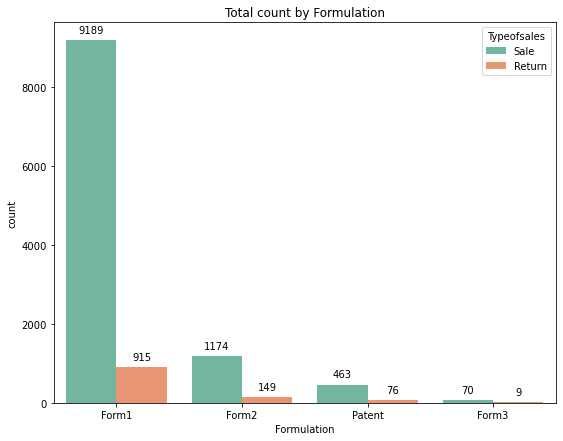

In [362]:
plt.figure(figsize=(9,7))
plt.title('Total count by Formulation')
ax = sns.countplot(x = 'Formulation', data = df, palette='Set2', hue='Typeofsales')
textDisplay_in_plots(ax)
plt.show()

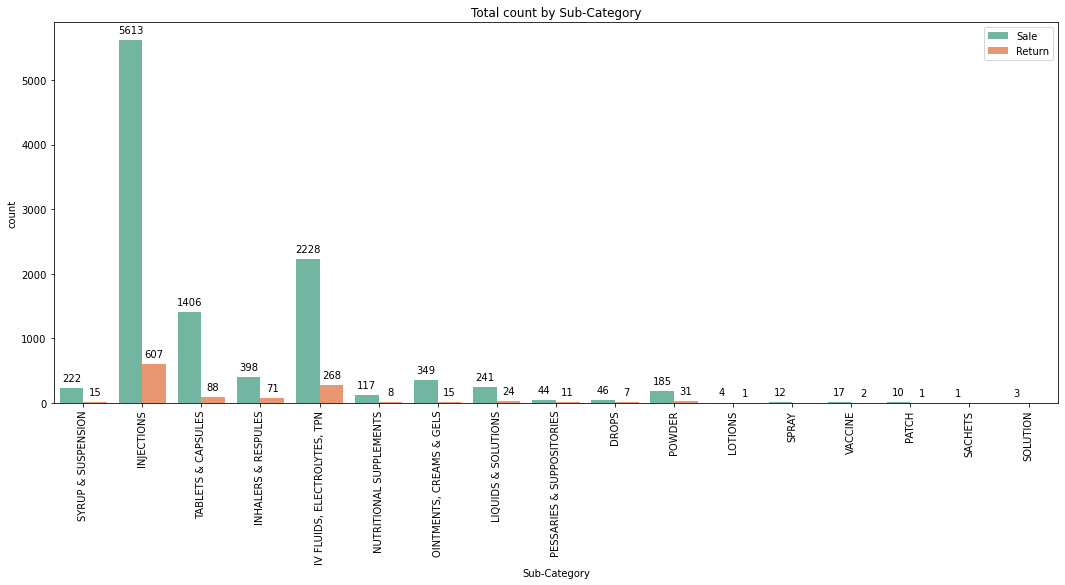

In [560]:
plt.figure(figsize=(18,7))
plt.xticks(rotation = 90)
plt.title('Total count by Sub-Category')
ax = sns.countplot(x = 'SubCat', data = df, palette='Set2', hue='Typeofsales')
textDisplay_in_plots(ax)
plt.xlabel('Sub-Category')
plt.legend(loc='upper right')
plt.show()

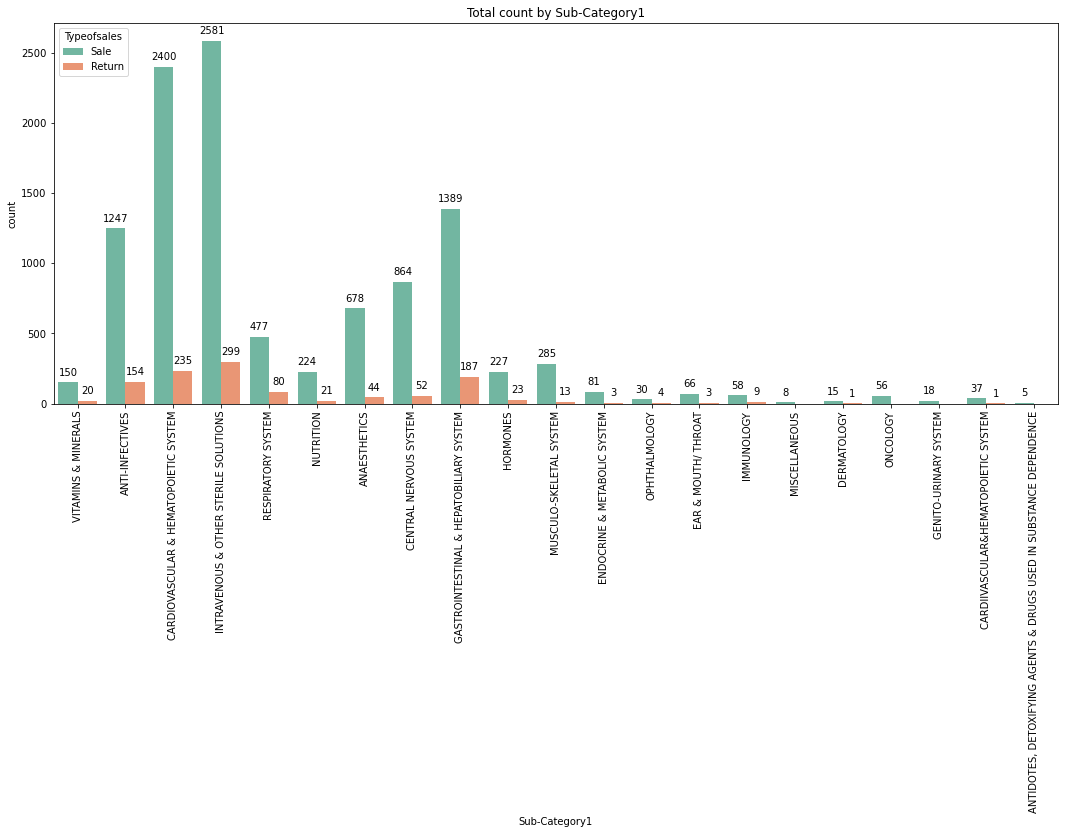

In [561]:
plt.figure(figsize=(18,7))
plt.xticks(rotation = 90)
plt.title('Total count by Sub-Category1')
ax = sns.countplot(x = 'SubCat1', data = df, palette='Set2', hue='Typeofsales')
textDisplay_in_plots(ax)
plt.xlabel('Sub-Category1')
plt.show()

In [38]:
monthly_salecounts = df_sales.groupby(df_sales['DateofBill'].dt.month)['Typeofsales'].count().reset_index()
monthly_salecounts.columns = ['Month','Sale_Count']
month_labels = [0,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [39]:
monthly_returncounts = df_return.groupby(df_return['DateofBill'].dt.month)['Typeofsales'].count().reset_index()
monthly_returncounts.columns = ['Month','Return_Count']
month_labels = [0,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

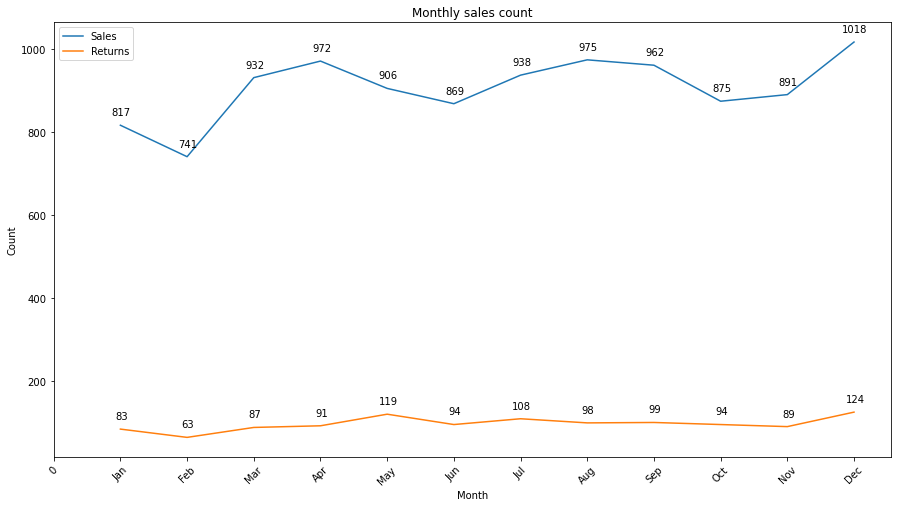

In [41]:
plt.figure(figsize=(15,8))
plt.title('Monthly sales count')
sns.lineplot(x='Month', y='Sale_Count',data=monthly_salecounts,label='Sales')   
sns.lineplot(x='Month', y='Return_Count',data=monthly_returncounts, label='Returns')   
plt.xticks(range(13), month_labels, rotation=45)
plt.ylabel('Count')
plt.legend()
for x, y in zip(monthly_salecounts['Month'], monthly_salecounts['Sale_Count']):
    plt.annotate(f'{y}', (x, y), textcoords='offset points', xytext=(1,10), ha='center')

for x, y in zip(monthly_returncounts['Month'], monthly_returncounts['Return_Count']):
    plt.annotate(f'{y}', (x, y), textcoords='offset points', xytext=(1,10), ha='center')
plt.show()

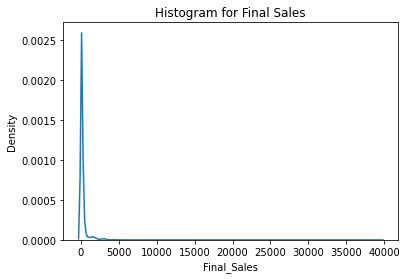

In [459]:
plt.title('Histogram for Final Sales')
sns.distplot(df_sales['Final_Sales'], kde = True,  hist=False)
plt.show()

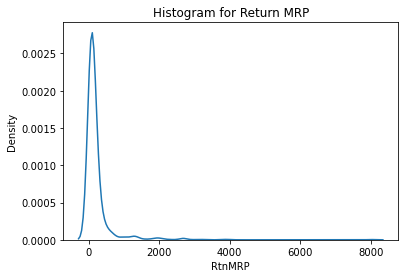

In [460]:
plt.title('Histogram for Return MRP')
sns.distplot(df_return['RtnMRP'], kde = True,  hist=False)
plt.show()

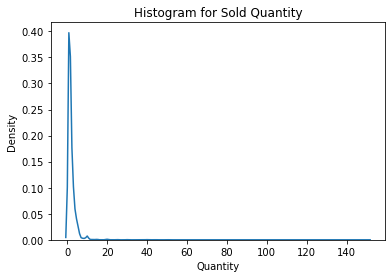

In [461]:
plt.title('Histogram for Sold Quantity')
sns.distplot(df_sales['Quantity'], kde = True,  hist=False)
plt.show()

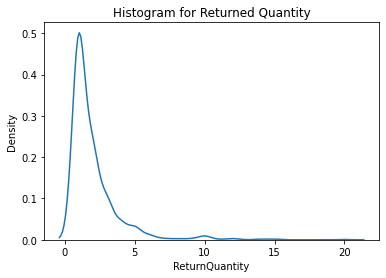

In [462]:
plt.title('Histogram for Returned Quantity')
sns.distplot(df_return['ReturnQuantity'], kde = True,  hist=False)
plt.show()

### Bivariate Analysis

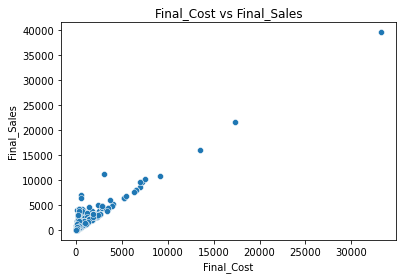

In [388]:
plt.title('Final_Cost vs Final_Sales')
sns.scatterplot(x='Final_Cost',y='Final_Sales',data=df_sales)
plt.show()

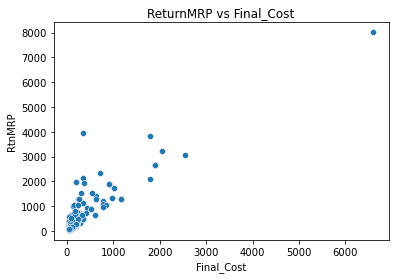

In [389]:
plt.title('ReturnMRP vs Final_Cost')
sns.scatterplot(x='Final_Cost',y='RtnMRP',data=df_return)
plt.show()

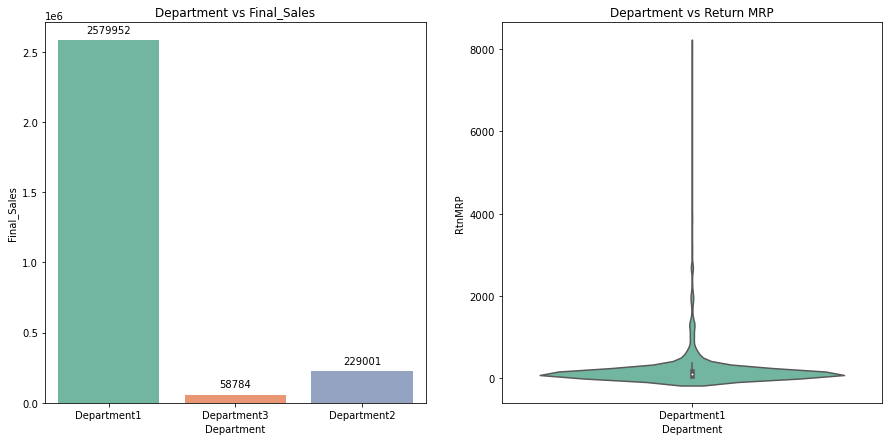

In [475]:
f,axes = plt.subplots(1,2,figsize = (15,7))

sns.barplot(y = 'Final_Sales', x = 'Dept', data = df_sales, palette ='Set2', ci=None, estimator=sum,ax=axes[0])
sns.violinplot(y = 'RtnMRP', x = 'Dept', data = df_return, palette ='Set2',ax=axes[1], estimator=sum)

axes[0].set_title('Department vs Final_Sales')
axes[1].set_title('Department vs Return MRP')

axes[0].set_xlabel('Department')
axes[1].set_xlabel('Department')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

plt.show()

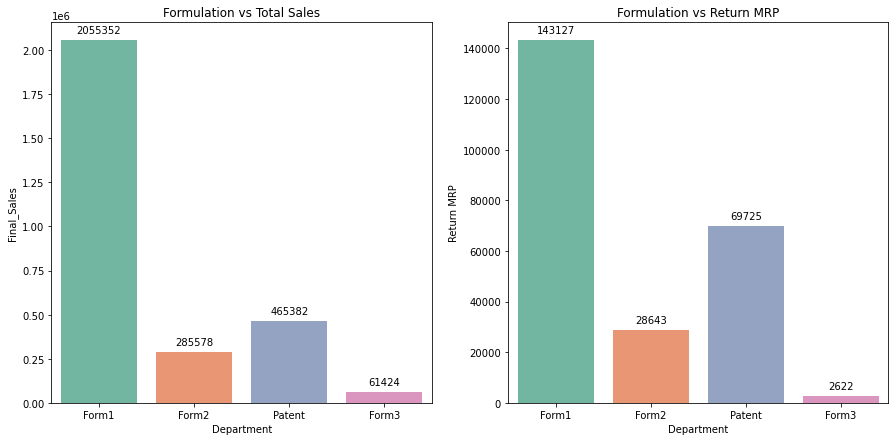

In [562]:
f,axes = plt.subplots(1,2,figsize = (15,7))

sns.barplot(y = 'Final_Sales', x = 'Formulation', data = df_sales, palette ='Set2',ax=axes[0], estimator=sum, ci=None)
sns.barplot(y = 'RtnMRP', x = 'Formulation', data = df_return, palette ='Set2',ax=axes[1], estimator=sum, ci=None)

axes[0].set_title('Formulation vs Total Sales')
axes[1].set_title('Formulation vs Return MRP')

axes[0].set_xlabel('Department')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Return MRP')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

plt.show()

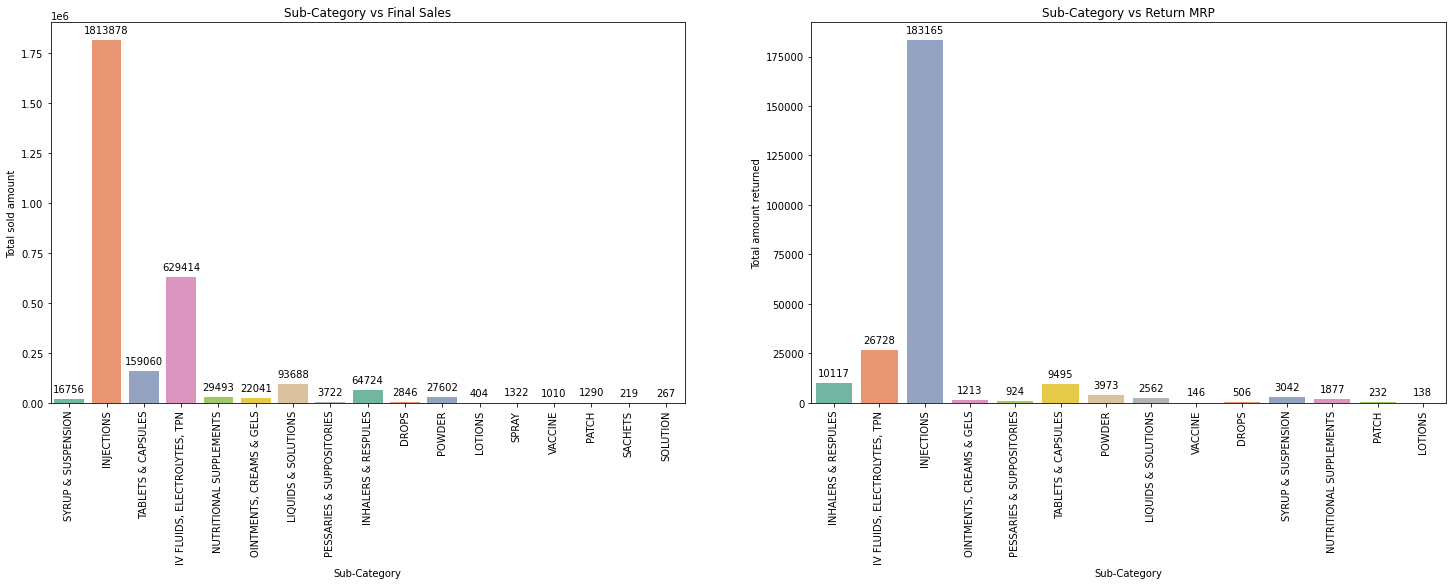

In [552]:
f,axes = plt.subplots(1,2,figsize = (25,7))

sns.barplot(y = 'Final_Sales', x = 'SubCat', data = df_sales, palette ='Set2', ci=None, estimator=sum, ax=axes[0])
sns.barplot(y = 'RtnMRP', x = 'SubCat', data = df_return, palette ='Set2', ci=None, estimator=sum, ax=axes[1])

axes[0].set_title('Sub-Category vs Final Sales')
axes[1].set_title('Sub-Category vs Return MRP')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Total sold amount')
axes[1].set_ylabel('Total amount returned')

axes[0].set_xlabel('Sub-Category')
axes[1].set_xlabel('Sub-Category')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

plt.show()

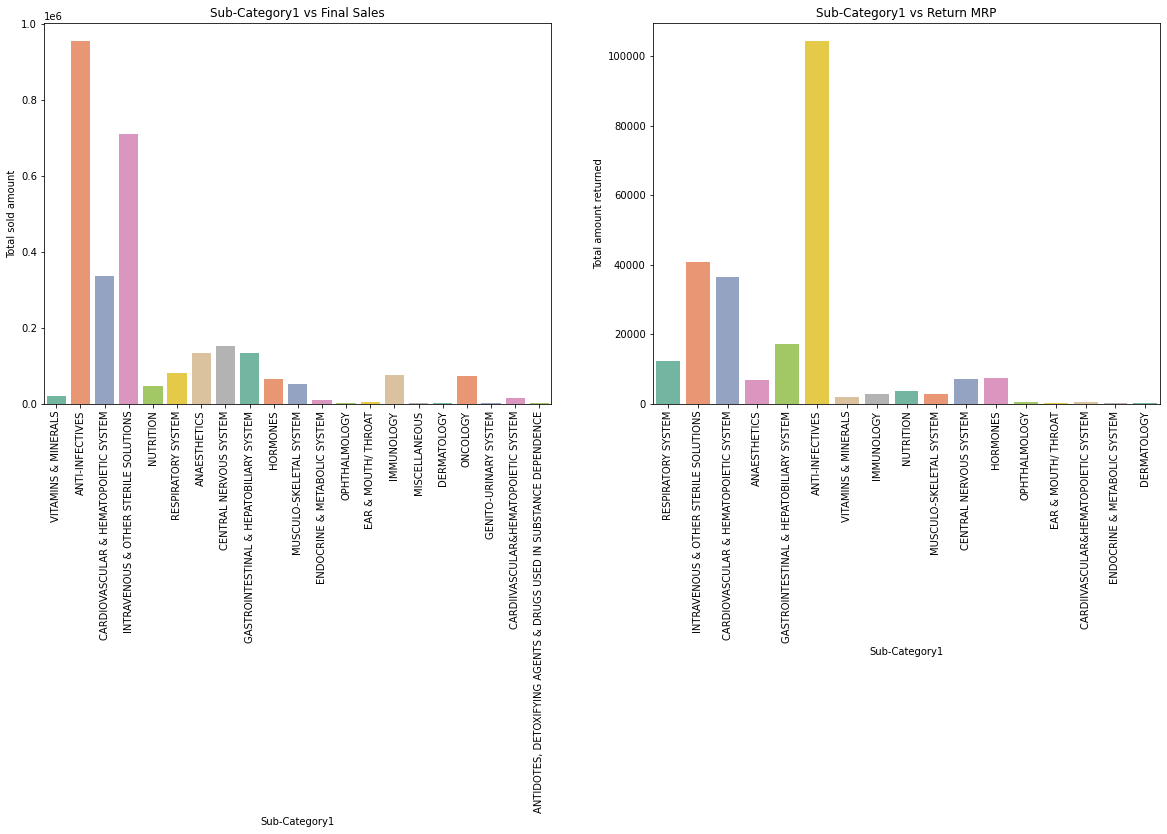

In [555]:
f,axes = plt.subplots(1,2,figsize = (20,7))

sns.barplot(y = 'Final_Sales', x = 'SubCat1', data = df_sales, palette ='Set2', ci=None, estimator=sum, ax=axes[0])
sns.barplot(y = 'RtnMRP', x = 'SubCat1', data = df_return, palette ='Set2', ci=None, estimator=sum, ax=axes[1])

axes[0].set_title('Sub-Category1 vs Final Sales')
axes[1].set_title('Sub-Category1 vs Return MRP')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Total sold amount')
axes[1].set_ylabel('Total amount returned')

axes[0].set_xlabel('Sub-Category1')
axes[1].set_xlabel('Sub-Category1')

plt.show()

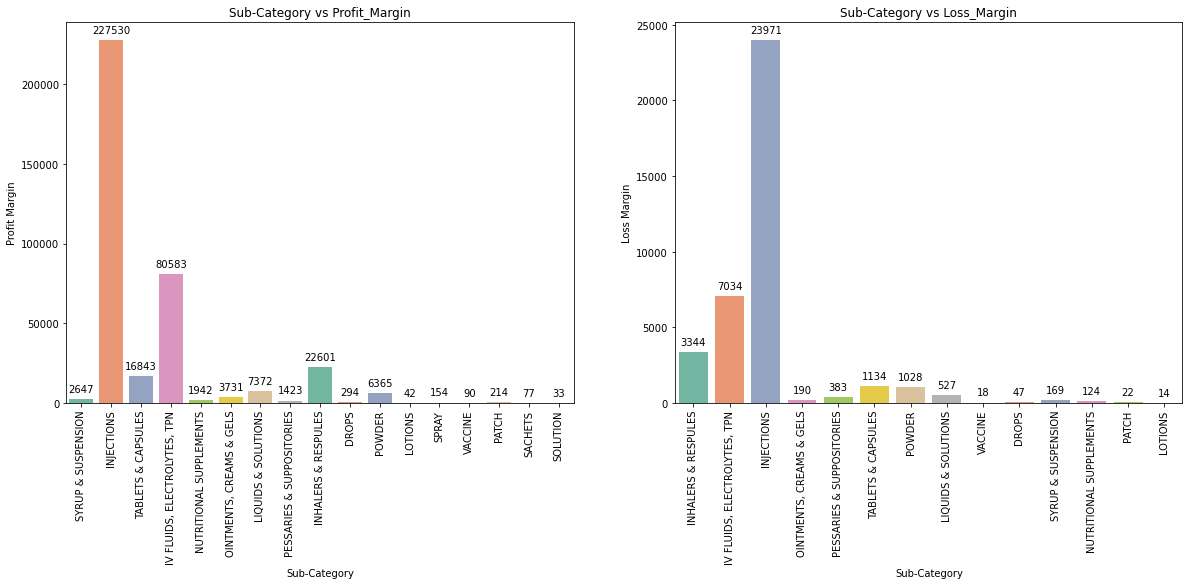

In [584]:
f,axes = plt.subplots(1,2,figsize = (20,7))

df_sales['Profit_Margin'] = ((df_sales['Final_Sales'] - df_sales['Final_Cost']) / df_sales['Final_Sales']) * 100
df_return['Loss_Margin'] = ((df_return['RtnMRP'] - df_return['Final_Cost']) / df_return['RtnMRP']) * 100

sns.barplot(y = 'Profit_Margin', x = 'SubCat', data = df_sales, palette ='Set2', ci=None, estimator=sum, ax=axes[0])
sns.barplot(y = 'Loss_Margin', x = 'SubCat', data = df_return, palette ='Set2', ci=None, estimator=sum, ax=axes[1])

axes[0].set_title('Sub-Category vs Profit_Margin')
axes[1].set_title('Sub-Category vs Loss_Margin')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Profit Margin')
axes[1].set_ylabel('Loss Margin')

axes[0].set_xlabel('Sub-Category')
axes[1].set_xlabel('Sub-Category')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

plt.show()

In [568]:
total_qty_sold = df_sales.groupby('DrugName')[['Quantity','Final_Sales','Final_Cost']].sum()
total_qty_sold_df = total_qty_sold.reset_index()
total_qty_sold_df['Profit_Margin'] = ((total_qty_sold_df['Final_Sales'] - total_qty_sold_df['Final_Cost']) / total_qty_sold_df['Final_Sales']) * 100
total_qty_sold_df

,DrugName,Quantity,Final_Sales,Final_Cost,Profit_Margin
0,ACEBROPHYLLINE 100MG CAP,2,142.04,127.39,10.32
1,ACEBROPHYLLINE 200MG TAB,6,512.00,447.07,12.68
2,ACECLOFENAC 100MG + PARACETAMOL 325MG + SERRAT...,6,375.54,341.66,9.02
3,ACECLOFENAC 100MG + PARACETAMOL 325MG TAB,3,160.76,151.30,5.88
4,ACYCLOVIR 200MG TAB,3,167.26,154.03,7.91
...,...,...,...,...,...
715,ZINC ACETATE 20MG/5ML SYP,1,59.26,55.41,6.50
716,ZINC OXIDE 30GM CREAM,5,236.80,149.25,36.97
717,ZINC OXIDE + CALENDULA + ALOE + JOJOBA OIL 100...,4,576.00,506.66,12.04
718,ZOLPIDEM 10MG TAB,3,125.89,124.70,0.94


In [569]:
total_qty_returned = df_return.groupby('DrugName')[['ReturnQuantity','RtnMRP','Final_Cost']].sum()
total_qty_returned_df = total_qty_returned.reset_index()
total_qty_returned_df['Loss_Margin'] = ((total_qty_returned_df['RtnMRP'] - total_qty_returned_df['Final_Cost']) / total_qty_returned_df['RtnMRP']) * 100
total_qty_returned_df

,DrugName,ReturnQuantity,RtnMRP,Final_Cost,Loss_Margin
0,ACEBROPHYLLINE 200MG TAB,1,86.00,76.80,10.70
1,ACYCLOVIR 200MG TAB,1,56.84,52.13,8.30
2,ACYCLOVIR 250MG INJ,1,128.35,77.18,39.87
3,ADENOSINE 6MG/2ML INJ,6,502.80,264.13,47.47
4,ADRENALINE INJ 1ML,79,3443.77,1011.59,70.63
...,...,...,...,...,...
230,VILDAGLIPTIN 50MG TAB,1,105.50,92.40,12.42
231,VITAMIN B1 + B6 + B9 + MINERALS TAB,3,263.40,224.73,14.68
232,VITAMIN K 1ML INJ,16,693.20,466.52,32.70
233,WATER FOR INJECTION 10ML SOLUTION,23,932.87,210.21,77.47


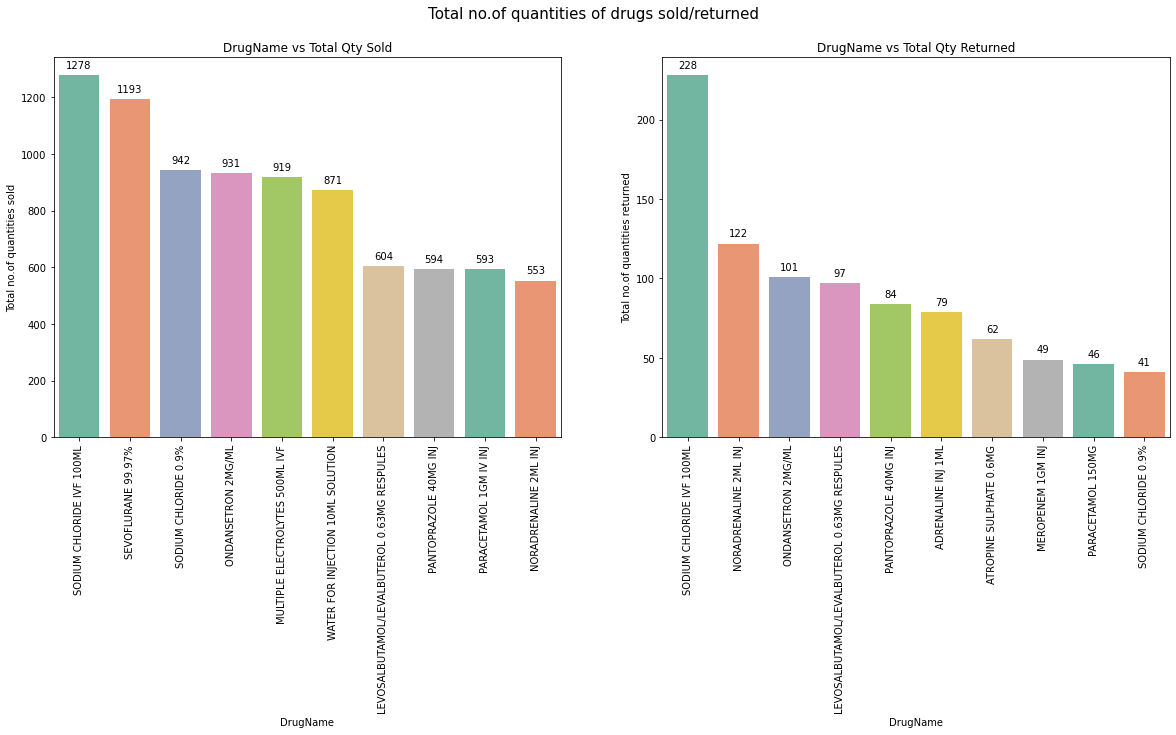

In [565]:
f,axes = plt.subplots(1,2,figsize = (20,7))

total_qty_sold_df = total_qty_sold_df.sort_values(by='Quantity', ascending=False)
total_qty_returned_df = total_qty_returned_df.sort_values(by='ReturnQuantity', ascending=False)

sns.barplot(x='DrugName', y='Quantity', data=total_qty_sold_df.head(10), palette ='Set2',ax=axes[0], estimator=sum, ci=None)
sns.barplot(x='DrugName', y='ReturnQuantity', data=total_qty_returned_df.head(10), palette ='Set2',ax=axes[1], estimator=sum, ci=None)

axes[0].set_title('DrugName vs Total Qty Sold')
axes[1].set_title('DrugName vs Total Qty Returned')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Total no.of quantities sold')
axes[1].set_ylabel('Total no.of quantities returned')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

f.suptitle('Total no.of quantities of drugs sold/returned', fontsize = 15, family = 'DejaVu Sans')

plt.show()

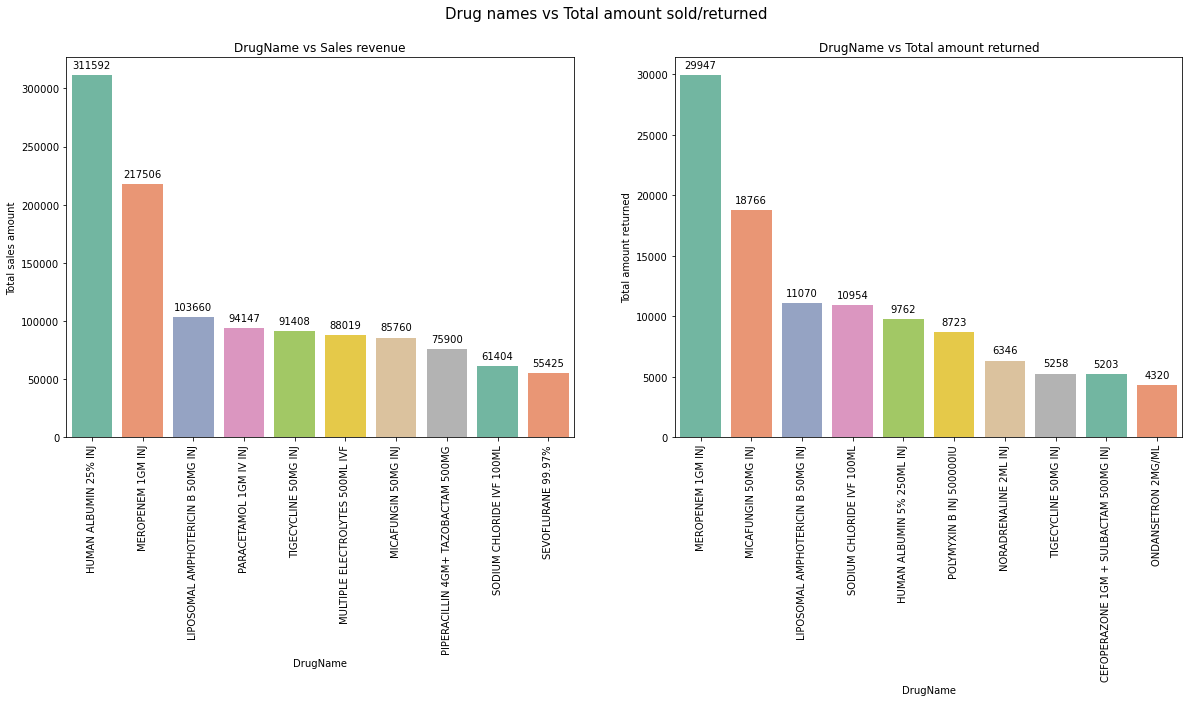

In [566]:
f,axes = plt.subplots(1,2,figsize = (20,7))

total_qty_sold_df = total_qty_sold_df.sort_values(by='Final_Sales', ascending=False)
total_qty_returned_df = total_qty_returned_df.sort_values(by='RtnMRP', ascending=False)

sns.barplot(x='DrugName', y='Final_Sales', data=total_qty_sold_df.head(10), palette ='Set2',ax=axes[0], estimator=sum, ci=None)
sns.barplot(x='DrugName', y='RtnMRP', data=total_qty_returned_df.head(10), palette ='Set2',ax=axes[1], estimator=sum, ci=None)

axes[0].set_title('DrugName vs Sales revenue')
axes[1].set_title('DrugName vs Total amount returned')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Total sales amount')
axes[1].set_ylabel('Total amount returned')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])

f.suptitle('Drug names vs Total amount sold/returned', fontsize = 15, family = 'DejaVu Sans')

plt.show()

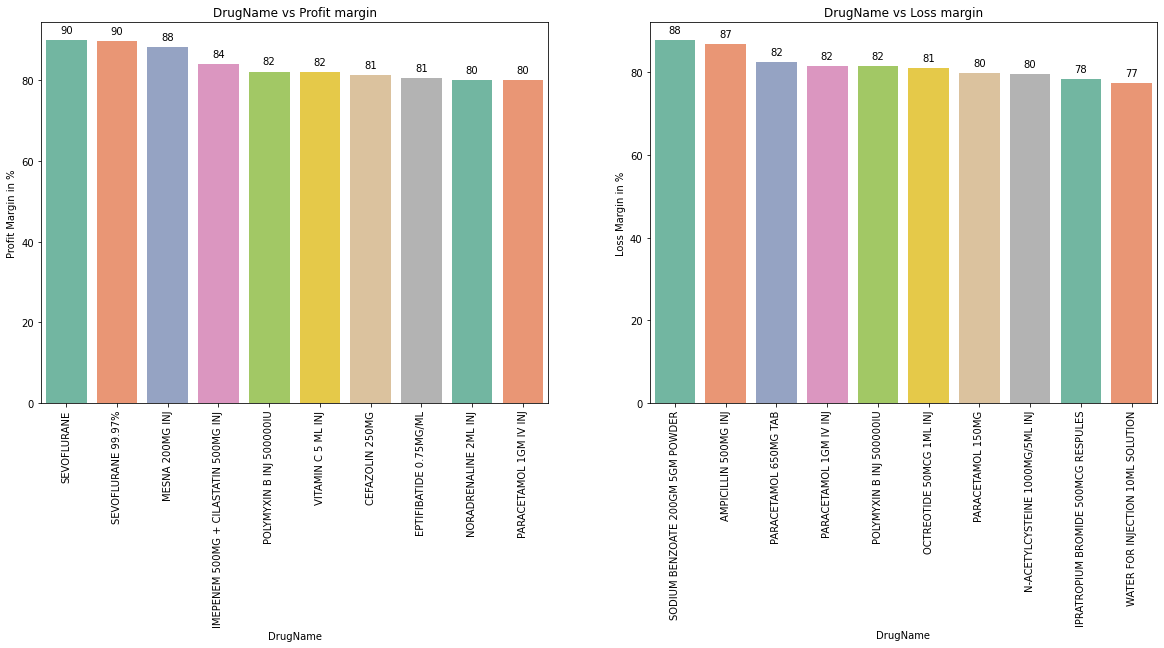

In [571]:
f,axes = plt.subplots(1,2,figsize = (20,7))

total_qty_sold_df = total_qty_sold_df.sort_values(by='Profit_Margin', ascending=False)
total_qty_returned_df = total_qty_returned_df.sort_values(by='Loss_Margin', ascending=False)

sns.barplot(x='DrugName', y='Profit_Margin', data=total_qty_sold_df.head(10), palette ='Set2',ax=axes[0], estimator=sum, ci=None)
sns.barplot(x='DrugName', y='Loss_Margin', data=total_qty_returned_df.head(10), palette ='Set2',ax=axes[1], estimator=sum, ci=None)

axes[0].set_title('DrugName vs Profit margin')
axes[1].set_title('DrugName vs Loss margin')

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

axes[0].set_ylabel('Profit Margin in %')
axes[1].set_ylabel('Loss Margin in %')

textDisplay_in_plots(axes[0])
textDisplay_in_plots(axes[1])


plt.show()

### Multivariate analysis

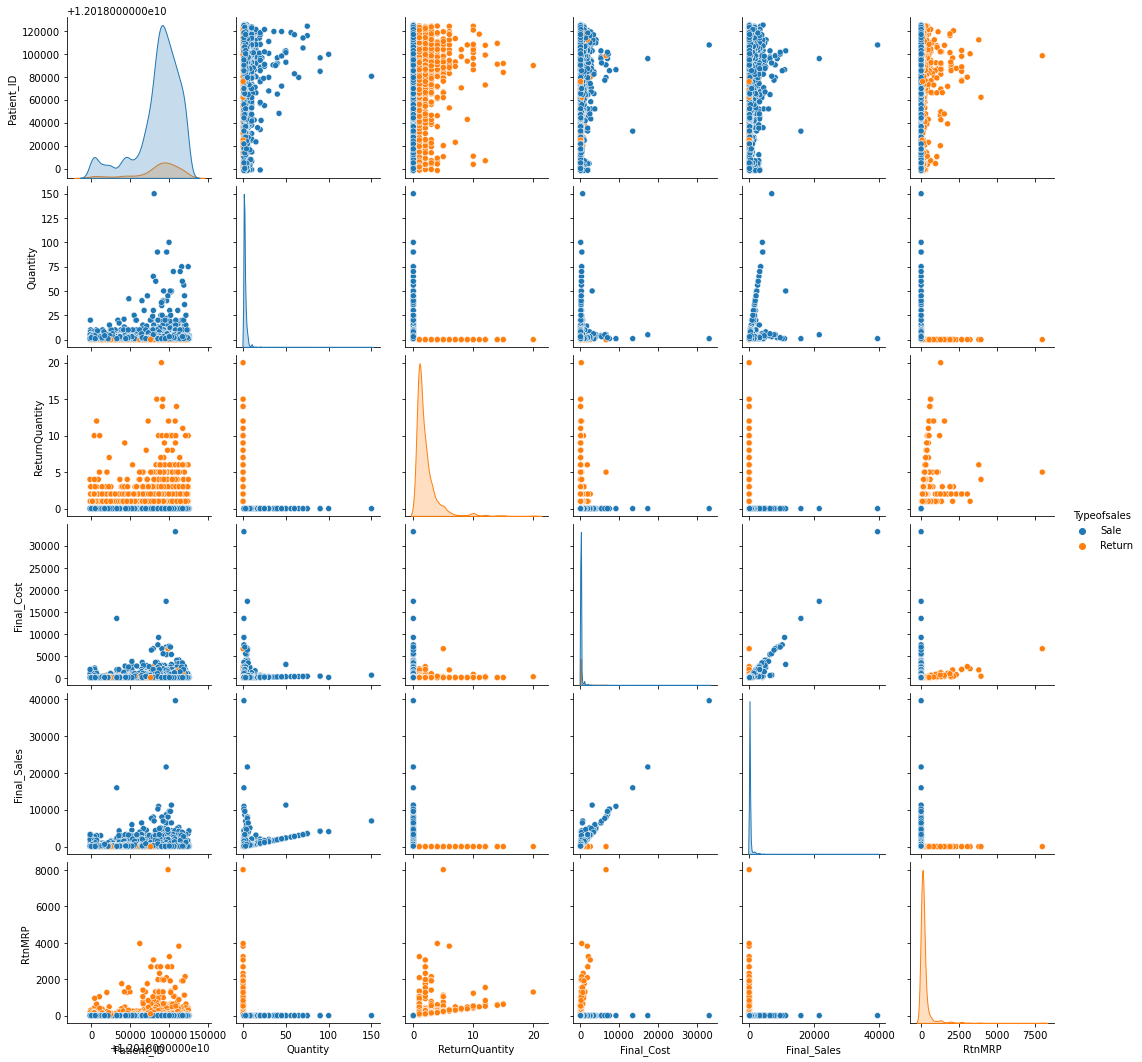

In [574]:
pair_plot = sns.pairplot(df, hue='Typeofsales')
pair_plot.savefig("pairplot.png")
plt.show()

<AxesSubplot:>

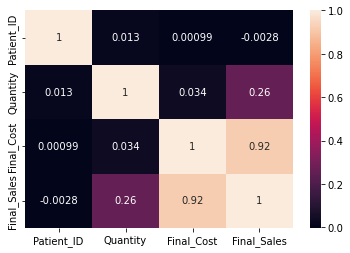

In [581]:
sns.heatmap(df_sales.corr(), annot = True)

<AxesSubplot:>

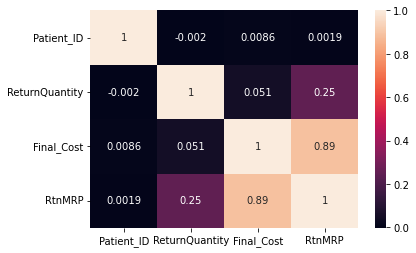

In [ ]:
sns.heatmap(df_return.corr(), annot = True)